In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# 1/ CHARGEMENT DES DONNEES
df=pd.read_csv('CC GENERAL.csv')
df=df.drop("CUST_ID", axis=1) # ON SUPRIME LA COLONNE CUST_ID

In [44]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [45]:
# recherche des informations manquantes
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [46]:
# ON REMPLACE LES ELEMENTS MANQUANTS
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [47]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [48]:
# VERIFICATION
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [49]:
# 2/ UTILISATION DU CLUSTERING HIERARCHIQUE
from sklearn.cluster import AgglomerativeClustering # ON Importe le clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  # On Applique agglomerative algorithm avec 5 clusters, en utilisant euclidean distance comme une metric


In [50]:
# CHOIX DES AXES
df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


In [51]:
# 2/ NOMBRE DE CLUSTER POUR CHAQUE POINT
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


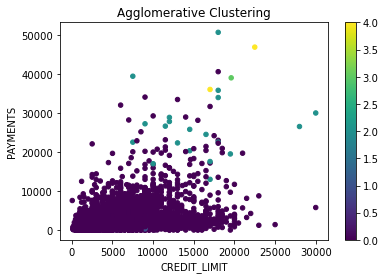

In [52]:
# 3/ Traçons les clusters
import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (df ['CREDIT_LIMIT'] , df ["PAYMENTS"] , c = agglomerative[0], s=20)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("CREDIT_LIMIT")
ax.set_ylabel("PAYMENTS")
plt.colorbar(scatter)


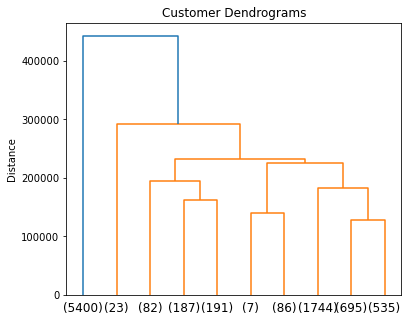

In [53]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage

Z=linkage(df,method="ward") # on calcule la distance avec la methode ward

# 4/ traçons le dendrogram
fig,ax=plt.subplots(1,1,figsize=(6,5))
_=dendrogram(Z,p=10,truncate_mode="lastp",ax=ax)
plt.title("Customer Dendrograms")
plt.ylabel("Distance")
plt.show()

In [54]:
from sklearn.cluster import KMeans  #On importe notre clustering algorithm: KMeans
kmeans=KMeans(n_clusters=2, random_state=0)  #on l'applique sur nos donnees en choisissant 5 comme nombre de clusters
kmeans.fit(df)

KMeans(n_clusters=2, random_state=0)

In [55]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,1
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


In [56]:
kmeans.predict(df)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[9.42033061e+02 8.60119256e-01 6.30448141e+02 3.29848250e+02
  3.00877322e+02 5.36608202e+02 4.72025974e-01 1.63214555e-01
  3.53198383e-01 1.09886650e-01 2.34011959e+00 1.10697608e+01
  3.03542398e+03 1.03134773e+03 6.17114064e+02 1.54945618e-01
  1.14567198e+01]
 [3.83448052e+03 9.39821048e-01 2.36262488e+03 1.55008326e+03
  8.12924772e+02 2.59177593e+03 5.57179111e-01 3.45574889e-01
  4.05425110e-01 2.27256886e-01 6.56282451e+00 2.79849429e+01
  9.81542292e+03 4.29254985e+03 1.76533716e+03 1.49225382e-01
  1.17383178e+01]]


In [57]:
# 5/ UTILISONS MAINTENANT DIFFERENTES VALEURS DE K
sum_of_squared_distances = []
for i in range(1,10):
    km=KMeans(n_clusters=i)
    km.fit(df)
    sum_of_squared_distances.append(km.inertia_)

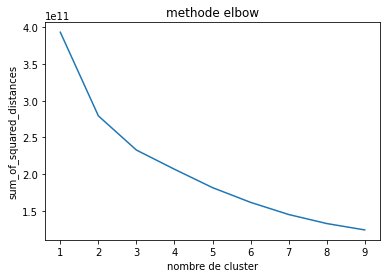

In [58]:
# on recherche le k optimal avec la methode elbow
plt.plot(range(1,10),sum_of_squared_distances)
plt.xlabel('nombre de cluster')
plt.ylabel('sum_of_squared_distances')
plt.title('methode elbow')
plt.show()

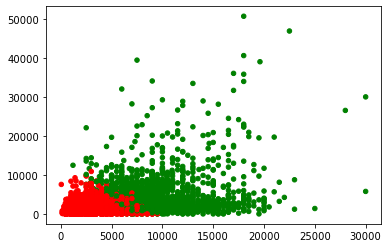

In [59]:
# 6/ traçons maintenant le cluster
import numpy as np
km=KMeans(n_clusters=3)
km.fit(df)
colormap=np.array(["red","green","blue"])
plt.scatter(df.CREDIT_LIMIT,df.PAYMENTS,c=colormap[kmeans.labels_],s=20)
plt.show()